In [204]:
import pandas as pd
import csv, sqlite3
import sqlalchemy
from matplotlib import pyplot as plt
import numpy as np

In [205]:
conn = sqlite3.connect('crime29.db')

conn.execute("DROP TABLE IF EXISTS CRIME;")

conn.execute('''
         CREATE TABLE CRIME
         (ID INT PRIMARY KEY NOT NULL,
         INCIDENT_NUMBER,
         DATE_REPORTED TEXT,
         DATE_OCCURED TEXT,
         UOR_DESC TEXT,
         CRIME_TYPE TEXT,
         NIBRS_CODE TEXT,
         UCR_HIERARCHY TEXT,
         ATT_COMP TEXT,
         LMPD_DIVISION TEXT,
         LMPD_BEAT TEXT,
         PREMISE_TYPE TEXT,
         BLOCK_ADDRESS TEXT,
         CITY TEXT,
         ZIP_CODE INT);''')

print ("Table created successfully");

Table created successfully


In [206]:
df=pd.read_csv("C:/Users/bourb/Downloads/Crime_Data_2018.csv")
df.to_sql("CRIME", conn, if_exists='append', index=False)

In [207]:
cur = conn.cursor()

In [208]:
cursor = conn.execute("""SELECT ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS FROM CRIME
                      WHERE ZIP_CODE = 40216 LIMIT 10""")

for row in cursor:
    print ("ID = ", row[0])
    print ("DATE_OCCURED = ", row[1])
    print ("CRIME_TYPE = ", row[2])
    print ("ZIP_CODE = ", row[3])
    print ("BLOCK_ADDRESS = ", row[4])
    print("\n")

print ("Operation done successfully");

ID =  1159127
DATE_OCCURED =  2018-01-30 17:29:00
CRIME_TYPE =  THEFT/LARCENY
ZIP_CODE =  40216
BLOCK_ADDRESS =  7100 BLOCK RAGGARD RD                                       


ID =  1159154
DATE_OCCURED =  2018-02-04 01:41:00
CRIME_TYPE =  OTHER
ZIP_CODE =  40216
BLOCK_ADDRESS =  4100 BLOCK CANE RUN RD                                      


ID =  1159158
DATE_OCCURED =  2018-01-04 11:28:00
CRIME_TYPE =  THEFT/LARCENY
ZIP_CODE =  40216
BLOCK_ADDRESS =  CANE RUN RD / ROCKFORD LN                                   


ID =  1159159
DATE_OCCURED =  2018-01-04 11:28:00
CRIME_TYPE =  DRUGS/ALCOHOL VIOLATIONS
ZIP_CODE =  40216
BLOCK_ADDRESS =  CANE RUN RD / ROCKFORD LN                                   


ID =  1159228
DATE_OCCURED =  2018-01-09 20:27:00
CRIME_TYPE =  DRUGS/ALCOHOL VIOLATIONS
ZIP_CODE =  40216
BLOCK_ADDRESS =  5000 BLOCK INVICTA DR                                       


ID =  1167924
DATE_OCCURED =  2018-03-01 19:00:00
CRIME_TYPE =  ASSAULT
ZIP_CODE =  40216
BLOCK_ADDRESS = 

In [209]:
conn.execute("DROP TABLE IF EXISTS CRIME_40216;")

conn.execute('''
         CREATE TABLE CRIME_40216
         (ID INT PRIMARY KEY NOT NULL,
         DATE_OCCURED TEXT,
         CRIME_TYPE TEXT,
         BLOCK_ADDRESS TEXT,
         ZIP_CODE INT);''')

cursor = conn.execute("""INSERT INTO CRIME_40216 (ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS) 
            SELECT ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS FROM CRIME
            WHERE ZIP_CODE = 40216 LIMIT 10000""")

In [210]:
query = "SELECT CRIME_TYPE, COUNT (*) AS NUMBER_OF_OCCURENCES FROM CRIME_40216 GROUP BY CRIME_TYPE;"

df = pd.read_sql_query(query, conn)

In [211]:
df.dropna()

,CRIME_TYPE,NUMBER_OF_OCCURENCES
0,ASSAULT,485
1,BURGLARY,178
2,DISTURBING THE PEACE,15
3,DRUGS/ALCOHOL VIOLATIONS,661
4,DUI,1
5,FRAUD,163
6,HOMICIDE,2
7,MOTOR VEHICLE THEFT,118
8,OTHER,290
9,ROBBERY,44


In [212]:
conn.execute("DROP TABLE IF EXISTS CRIME_40216_FINAL;")

conn.execute('''
         CREATE TABLE CRIME_40216_FINAL
         (CRIME_TYPE TEXT,
         NUMBER_OF_OCCURENCES INT);''')

conn.execute('''INSERT INTO CRIME_40216_FINAL (CRIME_TYPE, NUMBER_OF_OCCURENCES) SELECT CRIME_TYPE, COUNT (*) 
AS NUMBER_OF_OCCURENCES FROM CRIME_40216''')

df.to_sql("CRIME_40216_FINAL", conn, if_exists='append', index=False)

In [213]:
print (df)

                  CRIME_TYPE  NUMBER_OF_OCCURENCES
0                    ASSAULT                   485
1                   BURGLARY                   178
2       DISTURBING THE PEACE                    15
3   DRUGS/ALCOHOL VIOLATIONS                   661
4                        DUI                     1
5                      FRAUD                   163
6                   HOMICIDE                     2
7        MOTOR VEHICLE THEFT                   118
8                      OTHER                   290
9                    ROBBERY                    44
10                SEX CRIMES                    15
11             THEFT/LARCENY                   572
12                 VANDALISM                   179
13    VEHICLE BREAK-IN/THEFT                   155
14                   WEAPONS                    87


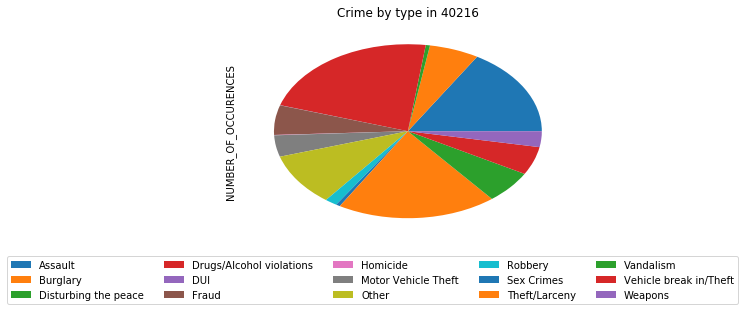

In [214]:
df.plot.pie(y='NUMBER_OF_OCCURENCES', labels=None, title='Crime by type in 40216')
plt.legend(labels=['Assault', 'Burglary',  'Disturbing the peace', 'Drugs/Alcohol violations', 'DUI', 'Fraud', 'Homicide', 
            'Motor Vehicle Theft', 'Other', 'Robbery', 'Sex Crimes', 'Theft/Larceny', 'Vandalism', 'Vehicle break in/Theft', 
            'Weapons'], bbox_to_anchor=(1.5, -0.05), ncol=5)


Text(0.5,1,'Crime by type in 40216')

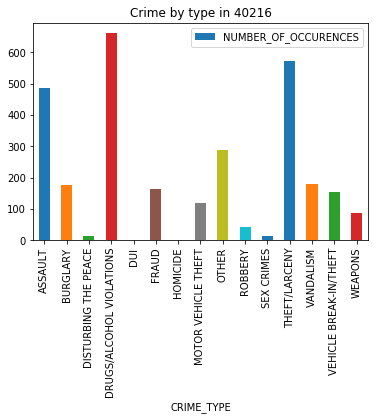

In [215]:
df.plot.bar(y= 'NUMBER_OF_OCCURENCES', x= 'CRIME_TYPE', align= 'center')
plt.title('Crime by type in 40216')

In [216]:
conn.execute("""SELECT ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS FROM CRIME
                      WHERE ZIP_CODE = 40217 LIMIT 10000""")

In [217]:
conn.execute("DROP TABLE IF EXISTS CRIME_40217;")

conn.execute('''
         CREATE TABLE CRIME_40217
         (ID INT PRIMARY KEY NOT NULL,
         DATE_OCCURED TEXT,
         CRIME_TYPE TEXT,
         BLOCK_ADDRESS TEXT,
         ZIP_CODE INT);''')

cursor = conn.execute("""INSERT INTO CRIME_40217 (ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS) 
            SELECT ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS FROM CRIME
            WHERE ZIP_CODE = 40217 LIMIT 10000""")

In [218]:
query = "SELECT CRIME_TYPE, COUNT (*) AS NUMBER_OF_OCCURENCES FROM CRIME_40217 GROUP BY CRIME_TYPE;"

dg = pd.read_sql_query(query, conn)

query1 = "SELECT COUNT (*) AS TOTAL_CRIME FROM CRIME_40217;"

dh = pd.read_sql_query(query1, conn)

In [219]:
dg.dropna()

,CRIME_TYPE,NUMBER_OF_OCCURENCES
0,ASSAULT,153
1,BURGLARY,75
2,DISTURBING THE PEACE,5
3,DRUGS/ALCOHOL VIOLATIONS,150
4,FRAUD,53
5,HOMICIDE,1
6,MOTOR VEHICLE THEFT,66
7,OTHER,168
8,ROBBERY,11
9,SEX CRIMES,6


In [220]:
dh.dropna()

,TOTAL_CRIME
0,1135


In [221]:
conn.execute("DROP TABLE IF EXISTS CRIME_40217_FINAL;")

conn.execute('''
         CREATE TABLE CRIME_40217_FINAL
         (CRIME_TYPE TEXT,
         NUMBER_OF_OCCURENCES INT);''')

dg.to_sql("CRIME_40217_FINAL", conn, if_exists='append', index=False)

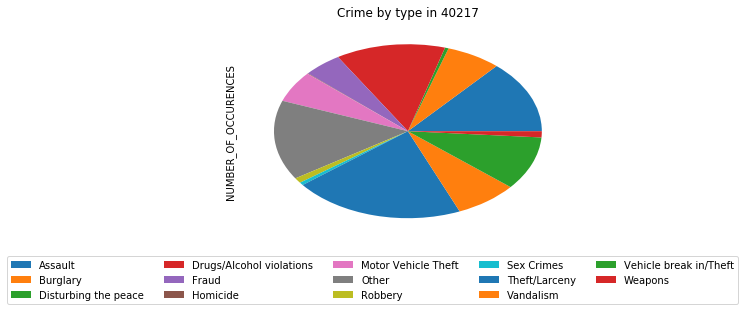

In [222]:
dg.plot.pie(y='NUMBER_OF_OCCURENCES', labels=None)
plt.title('Crime by type in 40217')
plt.legend(labels=['Assault', 'Burglary',  'Disturbing the peace', 'Drugs/Alcohol violations', 'Fraud', 'Homicide', 
            'Motor Vehicle Theft', 'Other', 'Robbery', 'Sex Crimes', 'Theft/Larceny', 'Vandalism', 'Vehicle break in/Theft', 
            'Weapons'], bbox_to_anchor=(1.5, -0.05), ncol=5)

Text(0.5,1,'Crime by type in 40217')

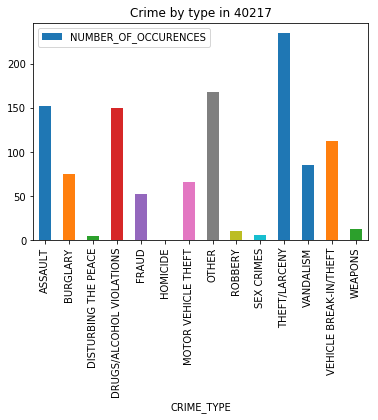

In [223]:
dg.plot.bar(y= 'NUMBER_OF_OCCURENCES', x= 'CRIME_TYPE', align= 'center')
plt.title('Crime by type in 40217')

In [224]:
conn.execute("""SELECT ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS FROM CRIME
                      WHERE ZIP_CODE = 40245 LIMIT 10000""")

In [225]:
conn.execute("DROP TABLE IF EXISTS CRIME_40245;")

conn.execute('''
         CREATE TABLE CRIME_40245
         (ID INT PRIMARY KEY NOT NULL,
         DATE_OCCURED TEXT,
         CRIME_TYPE TEXT,
         BLOCK_ADDRESS TEXT,
         ZIP_CODE INT);''')

cursor = conn.execute("""INSERT INTO CRIME_40245 (ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS) 
            SELECT ID, DATE_OCCURED, CRIME_TYPE, ZIP_CODE, BLOCK_ADDRESS FROM CRIME
            WHERE ZIP_CODE = 40245 LIMIT 10000""")

In [226]:
query = "SELECT CRIME_TYPE, COUNT (*) AS NUMBER_OF_OCCURENCES FROM CRIME_40245 GROUP BY CRIME_TYPE;"

di = pd.read_sql_query(query, conn)

query1 = "SELECT COUNT (*) AS TOTAL_CRIME FROM CRIME_40245;"

dj = pd.read_sql_query(query1, conn)

In [227]:
di.dropna()

,CRIME_TYPE,NUMBER_OF_OCCURENCES
0,ASSAULT,108
1,BURGLARY,34
2,DISTURBING THE PEACE,3
3,DRUGS/ALCOHOL VIOLATIONS,35
4,FRAUD,48
5,MOTOR VEHICLE THEFT,21
6,OTHER,93
7,ROBBERY,1
8,SEX CRIMES,4
9,THEFT/LARCENY,102


In [228]:
dj.dropna()

,TOTAL_CRIME
0,591


In [229]:
conn.execute("DROP TABLE IF EXISTS CRIME_40245_FINAL;")

conn.execute('''
         CREATE TABLE CRIME_40245_FINAL
         (CRIME_TYPE TEXT,
         NUMBER_OF_OCCURENCES INT);''')



di.to_sql("CRIME_40245_FINAL", conn, if_exists='append', index=False)

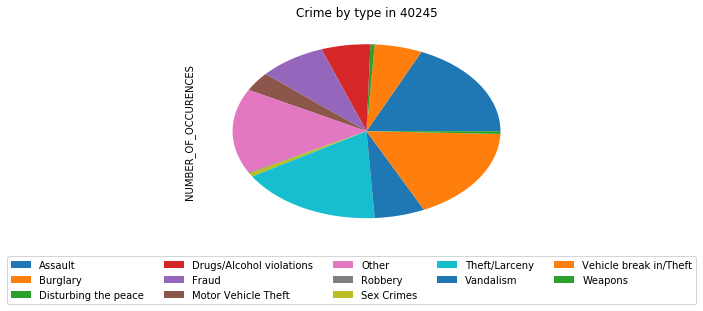

In [230]:
di.plot.pie(y='NUMBER_OF_OCCURENCES', labels=None)
plt.title('Crime by type in 40245')
plt.legend(labels=['Assault', 'Burglary',  'Disturbing the peace', 'Drugs/Alcohol violations', 'Fraud', 
            'Motor Vehicle Theft', 'Other', 'Robbery', 'Sex Crimes', 'Theft/Larceny', 'Vandalism', 'Vehicle break in/Theft', 
            'Weapons'], bbox_to_anchor=(1.5, -0.05), ncol=5)

Text(0.5,1,'Crime by type in 40245')

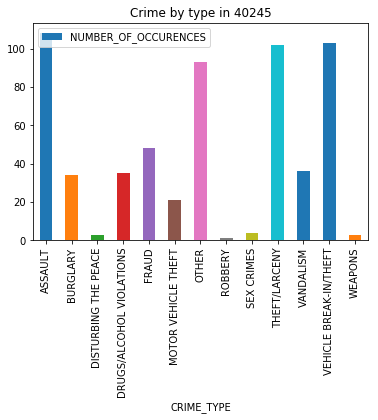

In [231]:
di.plot.bar(y= 'NUMBER_OF_OCCURENCES', x= 'CRIME_TYPE', align= 'center')
plt.title('Crime by type in 40245')

In [232]:
conn.close()